In [6]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,log_loss


In [7]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [9]:
x=df.drop(columns="Embarked")
y=df["Embarked"]
y

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [10]:
stand=StandardScaler()
X=stand.fit_transform(x)
X

array([[-1.73010796, -0.78927234,  0.82737724, ...,  0.91896631,
        -0.50244517,  0.45150219],
       [-1.72622007,  1.2669898 , -1.56610693, ...,  1.28262456,
         0.78684529, -1.38162664],
       [-1.72233219,  1.2669898 ,  0.82737724, ...,  1.64628282,
        -0.48885426,  0.45150219],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  1.67617254,
        -0.17626324,  0.45150219],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -1.64656796,
        -0.04438104, -1.9648949 ],
       [ 1.73010796, -0.78927234,  0.82737724, ...,  0.63501397,
        -0.49237783,  0.45150219]], shape=(891, 11))

In [11]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
model=Sequential()
model.add(Dense(320,activation="relu"))
model.add(Dense(160,activation="relu"))
model.add(Dense(80,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(1,activation="sigmoid"))




In [14]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
early=EarlyStopping(monitor="val_loss",patience=5,restore_best_weights=True)

In [16]:
history=model.fit(
    x_train,y_train,
    verbose=1,
    epochs=20,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early]
    )



Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.1160 - loss: 0.7576 - val_accuracy: 0.0629 - val_loss: 0.6776
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0879 - loss: 0.6728 - val_accuracy: 0.0629 - val_loss: 0.6596
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0879 - loss: 0.6528 - val_accuracy: 0.0629 - val_loss: 0.6391
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0879 - loss: 0.6304 - val_accuracy: 0.0629 - val_loss: 0.6157
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0879 - loss: 0.6050 - val_accuracy: 0.0629 - val_loss: 0.5886
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0879 - loss: 0.5755 - val_accuracy: 0.0629 - val_loss: 0.5571
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0879 - loss: 0.5408 - val_accuracy: 0.0629 - val_loss: 0.5206
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0879 - loss: 0.5005 - val_accuracy: 0.0629 - val_loss: 0.4778

In [17]:
loss,accuracy=model.evaluate(x_test,y_test)
print("loss:",loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1006 - loss: -1.0106 
loss: -1.010575771331787


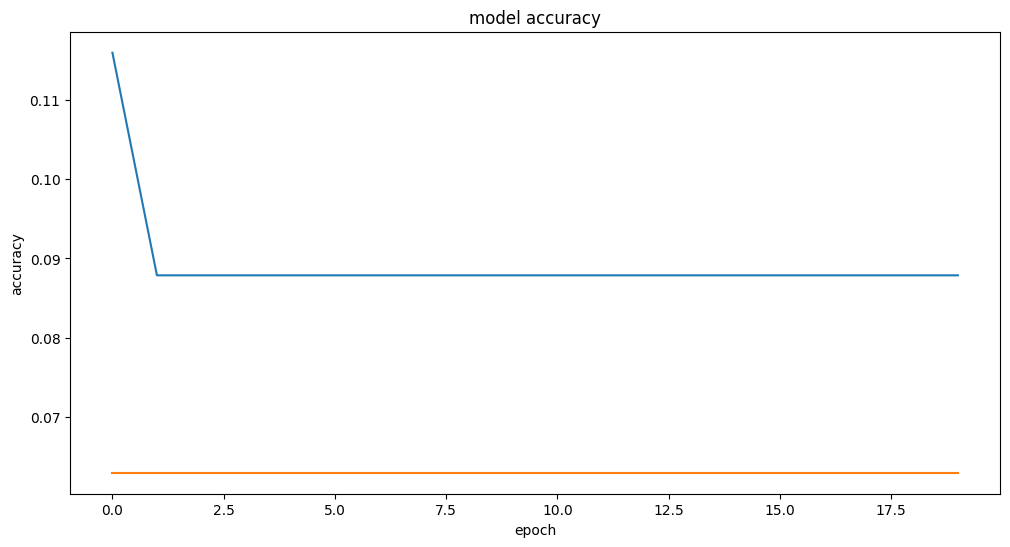

In [18]:
plt.figure(figsize=(12,6))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy") 
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

In [21]:
new=np.array([[0,0,0,0,1,1,1,1,1,1,1]])
new=stand.transform(new)
pred=model.predict(new)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[0.88911724]]


c:\Users\AKASH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
